In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [12]:
# 1. 데이터 불러오기
df = pd.read_csv(r"C:\Users\khj98\Documents\python\sk쉴더스루키즈\data\EX5_winequality-red.csv")

In [13]:
# 2. 특성 선택 (타겟 제외한 수치형 데이터 사용)
features = df.drop(columns=['quality'])

# 3. 정규화 (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 4. K-Means 클러스터링 (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

In [16]:
# 5. 클러스터 레이블 추가
df['Cluster'] = clusters

# 6. 클러스터별 평균값 비교
cluster_means = df.groupby('Cluster').mean()
print("🔍 클러스터별 평균값:\n")
print(cluster_means)

# 7. 클러스터별 품질 분포 확인
cluster_quality_table = pd.crosstab(df['Cluster'], df['quality'])

print("📊 클러스터별 품질 점수 분포:\n")
print(cluster_quality_table)

# 8. PCA로 2차원 축소 및 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

🔍 클러스터별 평균값:

         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             7.189889          0.609342     0.123047        2.214058   
1            10.067131          0.405080     0.469761        2.582570   
2             8.155467          0.535173     0.289680        3.105467   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.078553            13.507618             34.894737  0.995896   
1         0.100460            10.888446             30.627490  0.997574   
2         0.087235            27.108000             89.954667  0.997276   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.405762   0.609224  10.494044  5.552632  
1        3.195040   0.752131  10.724037  5.960159  
2        3.284267   0.626533   9.883

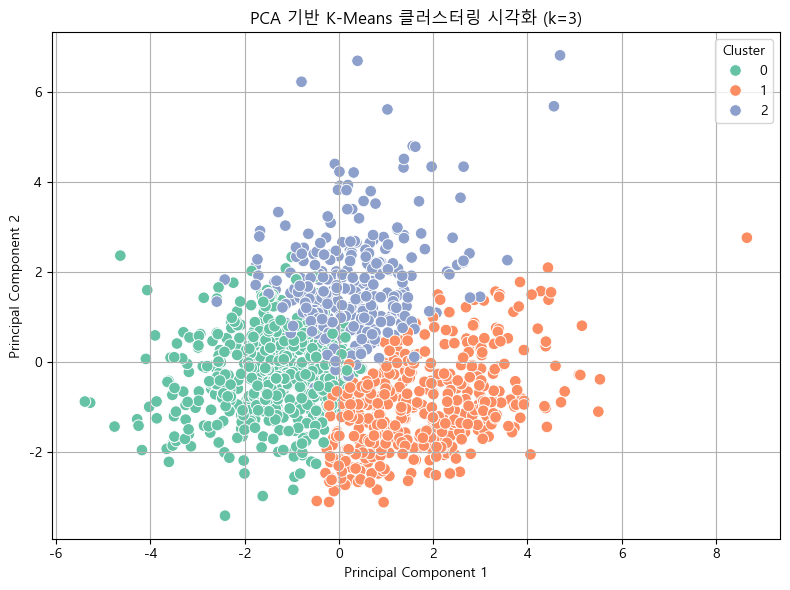

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=70)
plt.title('PCA 기반 K-Means 클러스터링 시각화 (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

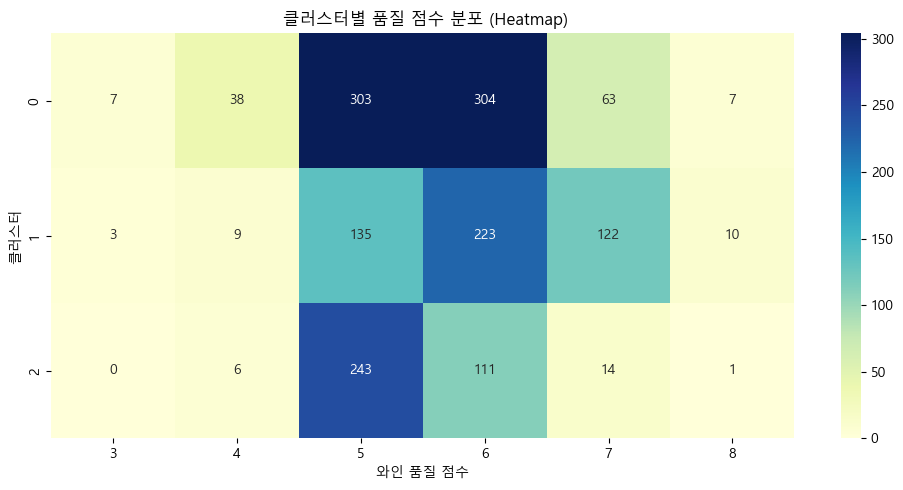

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_quality_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title(" 클러스터별 품질 점수 분포 (Heatmap)")
plt.xlabel("와인 품질 점수")
plt.ylabel("클러스터")
plt.tight_layout()
plt.show()